# 1 - Introduction


**Nama  : Enggar Kristian** 

**Batch : FTDS - 012** 

**Dataset   : stock_market_crash_2022.csv**

**Objective : estones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :**

    - Mampu memahami konsep Computer Vision/NLP.
    - Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
    - Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
    - Mampu menganalisis dan menjelaskan layer yang dibuat.


**Milestone 2 - Phase 2** 




# 2 - Import Libraries

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [3]:
# masuk folder "model_ml_dl"
% cd /content/gdrive/MyDrive/model_dl_ml

/content/gdrive/MyDrive/model_dl_ml


In [4]:
# Check folder 
!ls

huge-stock-market-crash-2022.zip
kaggle.json
model_dnn_1_imp
model_dnn_1_imp.h5
model_func
model_lstm_1_imp
model_seq
sentiment_analysis_stockcrash_model_dnn_improvement.png
sentiment_analysis_stockcrash_model_dnn.png
sentiment_analysis_stockcrash_model_dnn_tfidf.png
sentiment_analysis_stockcrash_model_lstm_improvement.png
sentiment_analysis_stockcrash_model_lstm.png
stock_market_crash_2022.csv
titanic


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import joblib
import pickle
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pathlib import Path

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import tensorflow as tf 
from tensorflow import keras
import pathlib
!pip install -q pysastrawi
from sklearn.metrics import confusion_matrix ,accuracy_score
np.random.seed(15)
tf.random.set_seed(15)
import re # for preprocessing text
import string # for preprocessing text
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, SpatialDropout1D, Dense, Dropout, Masking, Embedding, Flatten, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
tf.__version__

'2.8.2'

In [7]:
sklearn.__version__

'1.0.2'

# 3 - Data Loading



## About Dataset

**Stock Market crash 2022**
Gathered Tweets related to Stock Market Crash in 2022 from twitter on #stockmarketcrash.
The sentiment of the tweets column consists of three categories :
Positive 12542 tweets
Neutral 11498 tweets
Negative 9906 tweets

For more news : Forbes Worst of Stock market crash 2022 , The crash in the Nasdaq is looking a lot like the bursting of the 2000 dot-com bubble

**Inspiration**
You can perform multiple operations on the Stock Market Crash 2022 tweets. Here are few possible suggestions:

Study the subjects of recent tweets about the Stock Market Crash 2022;
Perform various NLP tasks on this data source (topic modelling, sentiment analysis);
Apply Bert for Sentiment analysis.
Follow the trends in the news about the Stock Market crash 2022.
Study the hashtags (associated to the tweets) distribution.

**Dataset formats**
'stockmarketcrash_2022.csv'

**Features**
The text_sentiment column denotes the sentiment of the text.

**Reference**
https://www.kaggle.com/datasets/tejasurya/huge-stock-market-crash-2022?select=stock_market_crash_2022.csv

In [8]:
# Import open source kaggle to this notebook
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"enggarkristian","key":"0a63b620944a30efea5ba916f39b2ad7"}'}

In [9]:
# create a kaggle folder
!mkdir ~/.kaggle

In [10]:
# copy the kaggle.json to folder create
!cp kaggle.json ~/.kaggle/

In [11]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets download -d tejasurya/huge-stock-market-crash-2022

huge-stock-market-crash-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip huge-stock-market-crash-2022.zip

Archive:  huge-stock-market-crash-2022.zip
replace stock_market_crash_2022.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
data = pd.read_csv('stock_market_crash_2022.csv')

data.head()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."


In [15]:
data.tail()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
33941,1477645974382260225,Hey #btc maxis!!\n\nDo you know what a Fibonac...,Neutral,captcrypto2020,"['btc', 'bearmarket']",2022-01-02 14:20:28+00:00,54,2,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
33942,1477633718726672397,@cryptolifemama #XRP and #HBAR will be resista...,Neutral,sharecryptoinfo,"['XRP', 'HBAR', 'bearmarket']",2022-01-02 13:31:46+00:00,24,1,0,2,0,en,NaN,NaN,NaN,1.477320e+18,https://twitter.com/cryptolifemama,"[User(username='cryptolifemama', id=1386086414..."
33943,1477533720894656512,$SPY $SPX\nNotes From a #Market #Degenerate: \...,Positive,LyfeOfPELK,"['Market', 'Degenerate', 'Chinese', 'China', '...",2022-01-02 06:54:24+00:00,576,2,1,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
33944,1477472665799733249,@chip82many @GarethSoloway Depends if you thin...,Positive,i_danforth,"['BullMarket', 'BearMarket', 'onchain']",2022-01-02 02:51:48+00:00,326,1,0,0,0,en,NaN,NaN,NaN,1.477398e+18,https://twitter.com/chip82many,"[User(username='chip82many', id=2369790510, di..."
33945,1477401716291158020,It looks like the market wants to fully enter ...,Positive,ludo_slav,"['crypto', 'bearmarket', 'BULLISH']",2022-01-01 22:09:52+00:00,32,2,0,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.shape

(33946, 18)

The size got 33946 rows and 18 columns. But this anlysis will doing with NLP and use 2 columns that is "text" and "text_sentiment"



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33946 entries, 0 to 33945
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    33946 non-null  int64  
 1   text                  33946 non-null  object 
 2   text_sentiment        33946 non-null  object 
 3   username              33946 non-null  object 
 4   hashtags              33945 non-null  object 
 5   created_at            33946 non-null  object 
 6   user followers count  33946 non-null  int64  
 7   replycount            33946 non-null  int64  
 8   retweetcount          33946 non-null  int64  
 9   likecount             33946 non-null  int64  
 10  quotecount            33946 non-null  int64  
 11  language              33946 non-null  object 
 12  media                 0 non-null      float64
 13  retweetedTweet        0 non-null      float64
 14  quotedtweet           0 non-null      float64
 15  inReplyToTweetId   

As we can see columns text and text_sentiment there is no anomaly data

In [18]:
# Know about unique all columns in dataset
for col in data:
    print(f'{col}: {data[col].unique()}')

id: [1538666561615015938 1538665013799489536 1538660868027830274 ...
 1477533720894656512 1477472665799733249 1477401716291158020]
text: ['When will the #NYSE #stockmarketcrash happen?'
 "Aaj ka gyan:\n\nIf a company isn't a quality company, don't buy it just because the price is low. Bargain-bin companies often produce bargain-bin results.\n\n#stockmarkets #stockmarketcrash #trading #investing #nifty #banknifty"
 "The stock market needs to crash hard to make it realistic. You can't just keep printing money and keep blowing up a bubble its gonna pop one way or another. Smh sell when people are greedy and buy when people are fearful. #stockmarketcrash #economy #rich #Fed"
 ...
 '$SPY $SPX\nNotes From a #Market #Degenerate: \nSome #Chinese names in the market are straight up buys. Markets in #China are in a straight up #bearmarket. Pickings are good. Discounted quality.'
 "@chip82many @GarethSoloway Depends if you think / feel we're still in a #BullMarket or since last ATH we changed to 

Many unique that can't describe all unique in this cell

In [19]:
# Copy dataset that can use to modification dataset
data_copy = data.copy() 

In [20]:
data_copy.columns

Index(['id', 'text', 'text_sentiment', 'username', 'hashtags', 'created_at',
       'user followers count', 'replycount', 'retweetcount', 'likecount',
       'quotecount', 'language', 'media', 'retweetedTweet', 'quotedtweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'],
      dtype='object')

In [21]:
data_copy.drop(columns=['id', 'username', 'hashtags', 'created_at',
       'user followers count', 'replycount', 'retweetcount', 'likecount',
       'quotecount', 'language', 'media', 'retweetedTweet', 'quotedtweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'], axis=1, inplace=True)
data_copy

,text,text_sentiment
0,When will the #NYSE #stockmarketcrash happen?,Neutral
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative
2,The stock market needs to crash hard to make i...,Negative
3,"Those who are ""Buying on DIP"" will very soon b...",Neutral
4,@rdrhwke I wish our so-called President were t...,Positive
...,...,...
33941,Hey #btc maxis!!\n\nDo you know what a Fibonac...,Neutral
33942,@cryptolifemama #XRP and #HBAR will be resista...,Neutral
33943,$SPY $SPX\nNotes From a #Market #Degenerate: \...,Positive
33944,@chip82many @GarethSoloway Depends if you thin...,Positive


Well this is filter from raw dataset that will be use to modeling.

# 4 - Exploratory Data Analysis (EDA)

## What happen Stock Market in 2022?

Base on https://abcnews.go.com/Business/stock-market-rest-2022-experts/story?id=86063588 they said Persistent threats to the market include inflation, ongoing interest rate hikes, the Russian invasion of Ukraine, and a potential recession. In the short term, these looming dangers will put downward pressure on the stock market, since market performance depends on the financial outlook of companies across the economy, experts said.


From https://www.forbes.com/advisor/investing/stock-market-outlook-and-forecast/ : A brutal start to the year for markets only got worse in June. The S&P 500 closed out the first half of the year down nearly 21%—the steepest first-half loss seen in more than five decades, leaving the benchmark index firmly in bear market territory.

If this year feels like a far cry from last year, it is. While 2021 saw the stock market soar to one new all-time high after another, 2022 has been defined by a prolonged selloff.

Consider this: The S&P 500 has posted daily declines on 56% of trading days this year, an about-face from the trend over the prior decade, when daily gains were more typical, occurring on 55% of trading days.

Investors looking for relief have found few safe havens, if any. The once red-hot crypto market has cooled into crypto winter. The price of Bitcoin (BTC) has plummeted nearly 60% this year, while Ethereum (ETH) is down more than 70%. Even gold, long considered a safe-haven asset, is down more than 4% year to date.

So that at that time it was trending on twitter which caused twitter users to express their freedom of speech.

In [22]:
data_copy['text'].nunique()

33164

The 33164 tweets that occurred caused users to issue various sentiments. From this opportunity, a dataset was created to create a Natural Language Program (NLP) model for sentiment analysis.

## Wordcloud EDA

Positive words


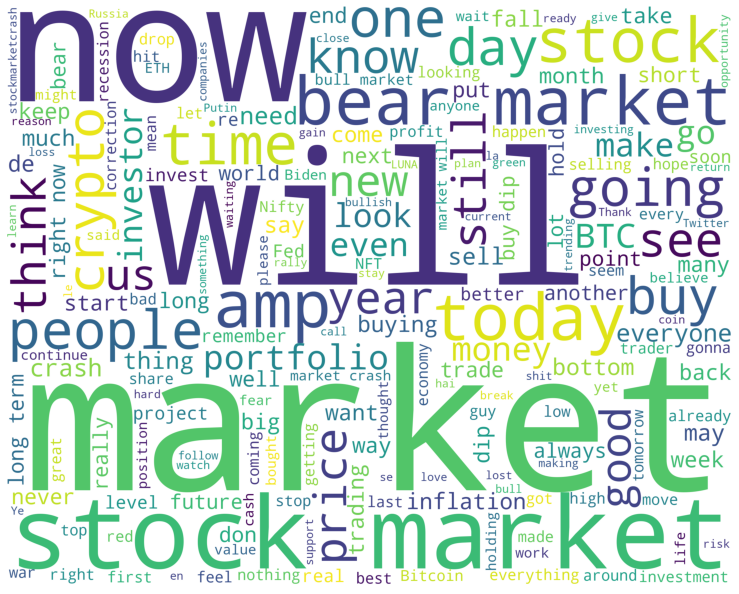

Neutral words


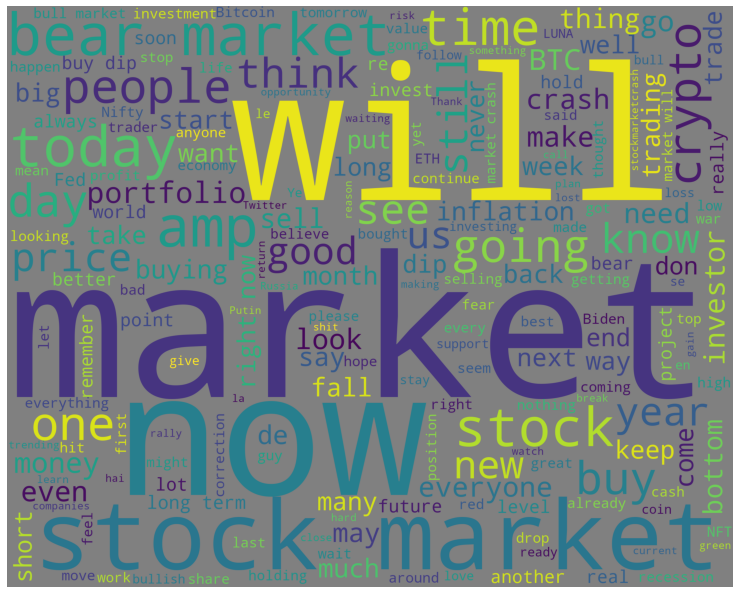

Negative words


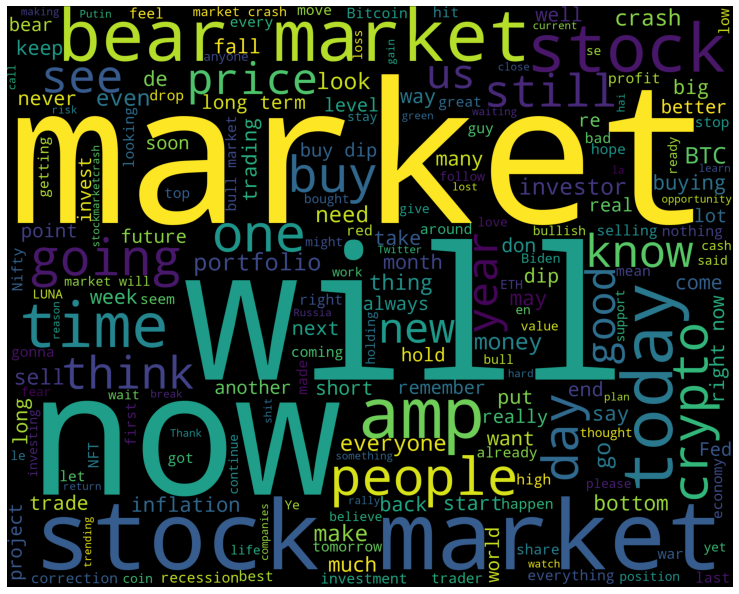

In [23]:
# Make wordcloud for want to know dominant words 
data_pos = data_copy[ data_copy['text_sentiment'] == 'Positive']
data_pos = data_copy['text']
data_neu = data_copy[ data_copy['text_sentiment'] == 'Positive']
data_neu = data_copy['text']
data_neg = data_copy[ data_copy['text_sentiment'] == 'Negative']
data_neg = data_copy['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(data_pos,'white')
print("Neutral words")
wordcloud_draw(data_pos,'grey')
print("Negative words")
wordcloud_draw(data_neg)

Interesting after make wordcloud with 3 labels sentiment we can see on the graph
- In compact words 'market', 'stock market', 'will', 'crypto' etc are in 3 labels.
- In labels Postive and Neutral not much different from the word dominance
- In the negative label there is no explicit word that appears, but there is a word that causes the market crash, namely "inflation" and has something to do with the American president, namely 'biden'

## Balance classification Data

In [24]:
data_copy['text_sentiment'].value_counts()

Positive    12542
Neutral     11498
Negative     9906
Name: text_sentiment, dtype: int64

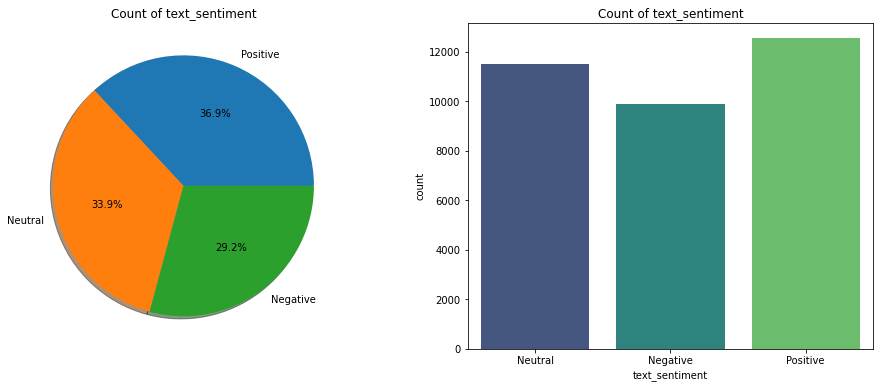

In [25]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data_copy['text_sentiment'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Count of Text Sentiment')
ax[0].set_title('Count of text_sentiment')
ax[0].set_ylabel('')
sns.countplot('text_sentiment',data=data,ax=ax[1], palette = 'viridis')
ax[1].set_title('Count of text_sentiment')
plt.show()

Well base on graph, the target label classification data clearly BALANCED. Positive tweets more dominant than others.

# 5 - Data Preprocessing

## Clean text


In this Natural Language Program, the data is tabular which contains text and sentiment labels. The text will be cleaned of annoying noise such as punctuation marks, numbers, special words, links, and others. So below I will do data cleaning.

In [26]:
# let's take a sample one text
data_copy['text'][50]


"If BULLS couldn't reclaim 15650 levels soon then expect more pain in Nifty50.\nDisclaimer:Reserve the right to be wrong. \n #stockmarkets #stockmarketcrash #niftyit"

In [31]:
def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = text.lower() # convert letters to lower case
  text = re.sub("@[A-Za-z0-9_]+"," ", text) #r emove mention
  text = re.sub("#[A-Za-z0-9_]+"," ", text) # remove hashtag
  text = re.sub(r"\\n"," ",text) # remove \n
  text = re.sub("[^a-zA-Z]", " ", text) # remove non-letters
  text = re.sub(r'\d+', '', text) # remove number
  text = re.sub(r'http\S+', '', text) # remove links
  text = re.sub(r"www.\S+", " ", text) # remove link
  text = re.sub("rt"," ",text) # remove RT
  text = text.translate(str.maketrans('','', string.punctuation)) # remove punctuation
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() # remove whitespaces

  # remove stopwords
  stpwds_id = list(set(stopwords.words('english')))
  stpwds_id.append('the’, ‘a’, ‘on’, ‘is’, ‘all’')

  tokens = word_tokenize(text)

  text = ' '.join([word for word in tokens if word not in stpwds_id])

  return text

- Create functions with regex to convert letters to lowercase, remove numbers, punctuation marks, special words, links, stickers and others. so that the machine can read a text one by one word from a sentence which later the word is converted into numbers.

- Then use stopwords, which is to eliminate affixes that often appear in English if the machine doesn't need to train it or you could say it reduces words to make the machine work more efficiently.

- After removing noise by regex and reducing words with stopwords, word tokenize is done to make a sentence into a vector per word.

- And be a function for cleaning text that serves to add results from training data created by deep learning models.

In [32]:
%%time
# The cleaning function applied in all reviews
data_copy['text_processed'] = data_copy['text'].apply(lambda x: clean_text(x))


CPU times: user 10.3 s, sys: 406 ms, total: 10.7 s
Wall time: 10.7 s


Apply function to dataset

In [33]:
data_copy['text_processed'][50]

'bulls reclaim levels soon expect pain nifty disclaimer reserve right wrong'

Well all text it should be clean from regex, stopwords, and stemming library.

In [34]:
data_copy.text_sentiment.unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [35]:
data_copy['label'] = data_copy['text_sentiment'].replace({'Neutral' : 0, 'Negative' : 1, 'Positive' : 2})
data_copy

,text,text_sentiment,text_processed,label
0,When will the #NYSE #stockmarketcrash happen?,Neutral,happen,0
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,aaj ka gyan company quality company buy price ...,1
2,The stock market needs to crash hard to make i...,Negative,stock market needs crash hard make realistic k...,1
3,"Those who are ""Buying on DIP"" will very soon b...",Neutral,buying dip soon become promoters company,0
4,@rdrhwke I wish our so-called President were t...,Positive,wish called president transitory mean really s...,2
...,...,...,...,...
33941,Hey #btc maxis!!\n\nDo you know what a Fibonac...,Neutral,hey maxis know fibonacci extension means,0
33942,@cryptolifemama #XRP and #HBAR will be resista...,Neutral,resistant,0
33943,$SPY $SPX\nNotes From a #Market #Degenerate: \...,Positive,spy spx notes names market straight buys marke...,2
33944,@chip82many @GarethSoloway Depends if you thin...,Positive,depends think feel still since last ath change...,2


Replace the label be a numeric from categorical:
- Neutral = 0
- Negative = 1
- Positive = 2


## Get Data for Model Inference

In [36]:
# Get Data for Model Inference

random_state = 25
data_inf = data_copy.sample(10, random_state=random_state)
data_inf

,text,text_sentiment,text_processed,label
3750,Check your crypto wallets. Unlike your boy Nic...,Neutral,check crypto wallets unlike boy nick cannon ti...,0
33365,#bearmarket bounce eh,Neutral,bounce eh,0
28127,Problem with LUNA/UST: UST's market cap was ab...,Negative,problem luna ust ust market cap luna ust stabl...,1
8503,blood bath #stockmarketcrash,Neutral,blood bath,0
24222,Don’t just bag up #Altcoins &amp; other #crypt...,Positive,bag amp everytime see dip much logical hope wo...,2
30159,EVERYTHING IS PLANNED AND GOING ACCORDING TO O...,Positive,everything planned going according desired path,2
26114,I'm letting my community accumulate my #NFTs d...,Neutral,letting community accumulate making prices slo...,0
6194,The biggest and most brutal upward movements a...,Negative,biggest brutal upward movements happening bear...,1
14856,I see lot many people and groups giving a lot ...,Positive,see lot many people groups giving lot emphasis...,2
21171,$BTC broke the $20k barrier. Many thought it w...,Negative,btc broke k barrier many thought happen means ...,1


In [37]:
# Remove Inference-Set from Dataset

data_train_test = data_copy.drop(data_inf.index)
data_train_test

,text,text_sentiment,text_processed,label
0,When will the #NYSE #stockmarketcrash happen?,Neutral,happen,0
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,aaj ka gyan company quality company buy price ...,1
2,The stock market needs to crash hard to make i...,Negative,stock market needs crash hard make realistic k...,1
3,"Those who are ""Buying on DIP"" will very soon b...",Neutral,buying dip soon become promoters company,0
4,@rdrhwke I wish our so-called President were t...,Positive,wish called president transitory mean really s...,2
...,...,...,...,...
33941,Hey #btc maxis!!\n\nDo you know what a Fibonac...,Neutral,hey maxis know fibonacci extension means,0
33942,@cryptolifemama #XRP and #HBAR will be resista...,Neutral,resistant,0
33943,$SPY $SPX\nNotes From a #Market #Degenerate: \...,Positive,spy spx notes names market straight buys marke...,2
33944,@chip82many @GarethSoloway Depends if you thin...,Positive,depends think feel still since last ath change...,2


In [38]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,text,text_sentiment,text_processed,label
0,Check your crypto wallets. Unlike your boy Nic...,Neutral,check crypto wallets unlike boy nick cannon ti...,0
1,#bearmarket bounce eh,Neutral,bounce eh,0
2,Problem with LUNA/UST: UST's market cap was ab...,Negative,problem luna ust ust market cap luna ust stabl...,1
3,blood bath #stockmarketcrash,Neutral,blood bath,0
4,Don’t just bag up #Altcoins &amp; other #crypt...,Positive,bag amp everytime see dip much logical hope wo...,2
5,EVERYTHING IS PLANNED AND GOING ACCORDING TO O...,Positive,everything planned going according desired path,2
6,I'm letting my community accumulate my #NFTs d...,Neutral,letting community accumulate making prices slo...,0
7,The biggest and most brutal upward movements a...,Negative,biggest brutal upward movements happening bear...,1
8,I see lot many people and groups giving a lot ...,Positive,see lot many people groups giving lot emphasis...,2
9,$BTC broke the $20k barrier. Many thought it w...,Negative,btc broke k barrier many thought happen means ...,1


Prepare some data inference with 10 rows is enough to do predict later.

## Splitting Dataset

In [39]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(data_copy.text_processed,
                                                               data_copy.label,
                                                               test_size=0.25, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  test_size=0.2, random_state=random_state)

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (20367,)
Validation data shape: (5092,)
Testing data shape: (8487,)


Unlike machine learning, in Deep Learning we do three splits.

## Handling Missing Value

In [40]:
# Check Missing Values

X_train.isnull().sum()

0

In [41]:
# Check Missing Values as Percentage to Total Data

X_train.isnull().mean()

0.0

There's no missing values here.

## Tokenization & Word Embedding

In [42]:
# Change object type be numerical
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

print(X_train_vec)

  (0, 1728)	4
  (0, 11951)	4
  (0, 1897)	4
  (0, 18868)	4
  (0, 2538)	1
  (0, 2633)	1
  (0, 18742)	1
  (0, 3039)	1
  (0, 11826)	1
  (1, 3594)	1
  (1, 2639)	2
  (1, 1444)	1
  (1, 17857)	1
  (1, 6482)	1
  (1, 19246)	1
  (1, 4776)	1
  (1, 2765)	1
  (1, 20673)	1
  (1, 8000)	1
  (1, 6246)	1
  (2, 17857)	2
  (2, 20358)	1
  (2, 16178)	1
  (2, 19477)	1
  (2, 11009)	1
  :	:
  (20364, 1293)	1
  (20364, 6124)	1
  (20364, 1313)	1
  (20365, 14486)	1
  (20365, 21061)	1
  (20365, 18399)	1
  (20366, 13720)	2
  (20366, 15542)	1
  (20366, 9239)	1
  (20366, 742)	1
  (20366, 17702)	1
  (20366, 10813)	1
  (20366, 4005)	2
  (20366, 14167)	1
  (20366, 8186)	1
  (20366, 3314)	1
  (20366, 8508)	1
  (20366, 19572)	1
  (20366, 5845)	1
  (20366, 11189)	1
  (20366, 5534)	1
  (20366, 20718)	1
  (20366, 18431)	1
  (20366, 6698)	1
  (20366, 8047)	1


Well after transform to numerik, it turns out that from the raw data of 33496 rows it turns out that the engine only detects 20366 different words in this dataset

In [43]:
# after we do transform to numerik, we should change to weight each words
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_val_tfidf = Transformer.transform(X_val_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

print(X_train_tfidf)

  (0, 18868)	0.3419190269248565
  (0, 18742)	0.10146244090114116
  (0, 11951)	0.6907206543442549
  (0, 11826)	0.1480845310863979
  (0, 3039)	0.1335504204197918
  (0, 2633)	0.08594814482021722
  (0, 2538)	0.138715279609146
  (0, 1897)	0.4599599513837099
  (0, 1728)	0.3431396470272989
  (1, 20673)	0.28762235387601764
  (1, 19246)	0.40968596751968644
  (1, 17857)	0.1486216811465774
  (1, 8000)	0.30062554354941007
  (1, 6482)	0.3165309917910682
  (1, 6246)	0.2732713594170492
  (1, 4776)	0.3883812960020855
  (1, 3594)	0.24255473290474186
  (1, 2765)	0.2572501851455265
  (1, 2639)	0.38559780343557004
  (1, 1444)	0.19380766257991539
  (2, 20358)	0.18130563212702303
  (2, 19477)	0.18379224654934578
  (2, 19212)	0.32459846871279047
  (2, 17857)	0.24842787546308912
  (2, 17171)	0.28870899806338096
  :	:
  (20364, 5202)	0.292188257063583
  (20364, 1313)	0.3209383937292606
  (20364, 1293)	0.3082162555849292
  (20365, 21061)	0.5421332277844227
  (20365, 18399)	0.7612777647317095
  (20365, 14486)	0.

The data has change, and ready to modeling!

## Embedding Layer in Deep Learning with Tensorflow

In [44]:
# Want to know how many vocab and maximum words in a text
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Length vocab:",total_vocab)
print("Length Maximum Text:",max_sen_len,"words")

Length vocab: 21096
Length Maximum Text: 55 words


Want to know size of total vocabulary that will be to input shape in model definition

Well there is 21025 vocabulary in dataset and theres 55 words in one text in the dataset.

In [45]:
# define vocab than convert to numeric
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # if i want to use sequential API
                                       )

text_vectorization.adapt(X_train) # adapt looks like fit

Input the total vocabulary and maximum length word in the text to the TextVetorization, for be an input shape later. 

In [46]:
# let's check the result vectorization
data_copy.text_processed[50]

'bulls reclaim levels soon expect pain nifty disclaimer reserve right wrong'

In [47]:
# after convert it
text_vectorization([data_copy.text_processed[0]])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[184,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]])>

Just word 'bulls' that have many vocab in this dataset. Text Vectorization look like label encoder that's change the text to be a number. 

In [48]:
# Change the numerical to weight with embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=256,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [49]:
# see the result
emb_res = embedding(text_vectorization([data_copy.text_processed[50]]))
emb_res

<tf.Tensor: shape=(1, 55, 256), dtype=float32, numpy=
array([[[ 0.00585105, -0.04287832, -0.02254468, ..., -0.02185477,
          0.04564831, -0.0307455 ],
        [-0.02380244,  0.04385288, -0.00094993, ...,  0.00989293,
         -0.00231401, -0.02306112],
        [ 0.0265859 , -0.01389961, -0.01969043, ..., -0.03298407,
          0.0332978 , -0.04759742],
        ...,
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061]]], dtype=float32)>

Dataset has converted. Embedding looks like scaling in feature engineering. 

In [50]:
# let's check weight word "bulls"
emb_res[0][50]

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 0.04200996, -0.02586603, -0.04366267,  0.01931553, -0.04124985,
        0.00263814,  0.0129753 ,  0.01802901,  0.03233477, -0.0102366 ,
        0.04894796,  0.00026834,  0.00773419, -0.00899953,  0.02323053,
        0.04750606, -0.02957588,  0.02470812, -0.00470213,  0.01084099,
        0.04845404,  0.00522301,  0.00876494, -0.03686251, -0.00871976,
       -0.03295654,  0.01805468,  0.04199804, -0.04373683, -0.00894874,
       -0.04747618, -0.00704725,  0.0358401 ,  0.00308373,  0.04603868,
        0.02184201,  0.02863749,  0.00142432,  0.04526648,  0.03399894,
        0.00143331,  0.01135183, -0.02315274,  0.03949079, -0.01532304,
       -0.02670971,  0.00771414, -0.02957885, -0.03566369,  0.04687226,
        0.01011127,  0.0053674 , -0.0452551 ,  0.00675543, -0.04331345,
        0.03934649,  0.02883391, -0.04775634,  0.02780211, -0.01433593,
       -0.0347268 ,  0.02337996,  0.03316471, -0.02974241, -0.0266278 ,
        0.038714

well define the weight with embedding for each word in 256 dimensions.

## Get Dummies

Before we modeling, we will do dummy the target, this is looks like onehotencoder with manual coding. Labels will be a features after dummy according to its uniqueness, if a certain line is detected, the label will contain a value of 1

In [51]:
# convert label
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

y_train_ohe

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

The result will be an array.

In [52]:
# if we looks in dataframe will be like this
pd.get_dummies(y_train)

,0,1,2
25409,0,0,1
8895,0,1,0
16620,0,1,0
15699,0,0,1
18226,0,1,0
...,...,...,...
26357,0,0,1
21250,0,0,1
11236,0,1,0
32608,1,0,0


There are 3 uniques in column 'label' so will be define 3 features in dataframe.

# 6 - Model Definition

Pada sub bab ini saya akan melakukan trial and error dengan model deep learning untuk Natural Language Program. 

## Deep Neural Network (DNN)




### First Research

In [53]:
model_dnn_1 = Sequential()
model_dnn_1.add(text_vectorization)
model_dnn_1.add(embedding)
model_dnn_1.add(GlobalAveragePooling1D())
model_dnn_1.add(Dense(32,activation='relu'))
model_dnn_1.add(Dense(3,activation='softmax'))

model_dnn_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')



- I'm here doing my first research with a very simple structure using DNN, which for input shapes is predefined with vectorization, and converts letters into numbers using embedding.

- GlobalAveragePooling1D, where all text will be averaged globally and then converted to 1 dimension.

- Next I only use Single Hidden Layer with 32 layers, the activation is relu. Followed by the output layer with activation softmax which is this dataset is a categorical target with 3 labels.

- Then compile it with loss categorical_crossentropy, optimizer adam, and metrics accuracy, to find out the movement of the data train graph with data validation in the learning curve graph.

In [54]:
model_dnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 256)           5400576   
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5,408,899
Trainable params: 5,408,899
Non-

So from the first research, we get a fairly large parameter, namely 5,408,899 of the many vocabularies obtained

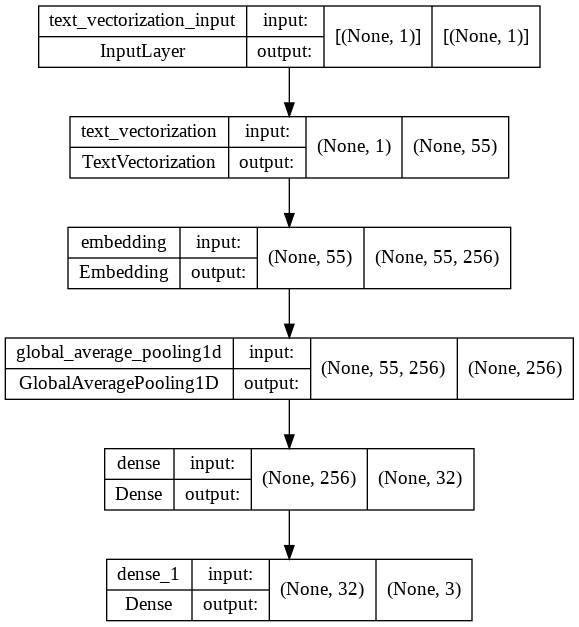

In [55]:
keras.utils.plot_model(model_dnn_1, "sentiment_analysis_stockcrash_model_dnn.png", show_shapes=True)

Since I use sequential models and all models of sequential type for my research, the structure of this model is the same as series.

### Improvement

In [188]:
model_dnn_1_imp = Sequential()
model_dnn_1_imp.add(text_vectorization)
model_dnn_1_imp.add(embedding)
model_dnn_1_imp.add(GlobalAveragePooling1D())
model_dnn_1_imp.add(Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_dnn_1_imp.add(Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_dnn_1_imp.add(Dense(3,activation='softmax'))

model_dnn_1_imp.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics='accuracy')



Improvements to my first research model:

- the input shape is still the same using vectorization and embedding

- Using GlobalAveragePooling1D because it is a type of Deep Neural Networks

- Ok, the improvement here I use a double hidden layer with the first dense layer 256 with activation relu, added regularizer L2, added normal random initializer with standard deviation 0.5

- Hidden second dense layer 128 layers with activation relu regularizer, initializer is same as first dense layer.

- For the same output use softmax with 3 labels

- Compile this time I added a learning rate of 0.0001 in order to prevent plot learning curves from exploding.

In [57]:
model_dnn_1_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 256)           5400576   
                                                                 
 global_average_pooling1d_1   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 3)                

The Parameters of course increase since I added double hidden layer

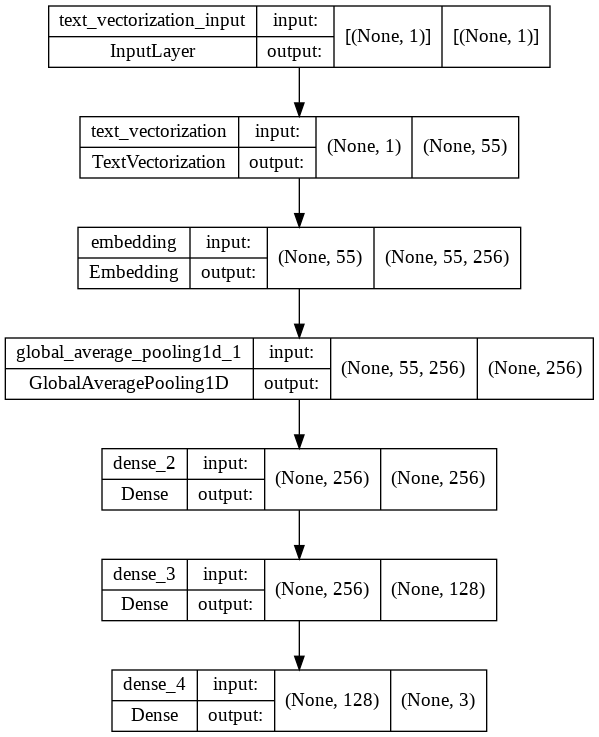

In [58]:
keras.utils.plot_model(model_dnn_1_imp, "sentiment_analysis_stockcrash_model_dnn_improvement.png", show_shapes=True)

The structure is the same as before, which is a series because it uses sequential.

### Model Tfidf

In [59]:
print(total_vocab)
print(X_train_tfidf.shape)

21096
(20367, 21096)


In [60]:
# change embedding input_length with total_vocab
embedding_tfidf = Embedding(input_dim=total_vocab,
                      output_dim=256,
                      embeddings_initializer="uniform",
                      input_length=total_vocab
                      )

model_dnn_2 = Sequential()
model_dnn_2.add(embedding_tfidf)
model_dnn_2.add(GlobalAveragePooling1D())
model_dnn_2.add(Dense(32,activation='relu'))
model_dnn_2.add(Dense(3,activation='softmax'))

model_dnn_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


Well here I try to use tfidf which is made from scikit learn which is converting text into a number as well as a vectorizer from tensorflow following an explanation of the definition of the model:

- Model using sequential

- Added new embedding specifically for tfidf embedding with input_length which is the same as total_vocab which if it is not balanced the feature will be an error

- Using GlobalAveragePooling1D DNN

- It's quite simple to use a single hidden layer with 32 layers and activation relu

- Output layer using softmax with 3 labels

In [61]:
model_dnn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21096, 256)        5400576   
                                                                 
 global_average_pooling1d_2   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 32)                8224      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5,408,899
Trainable params: 5,408,899
Non-trainable params: 0
_________________________________________________________________


The parameters are the same as my first research using shape tensor flow input, namely 5,408,899 parameters.

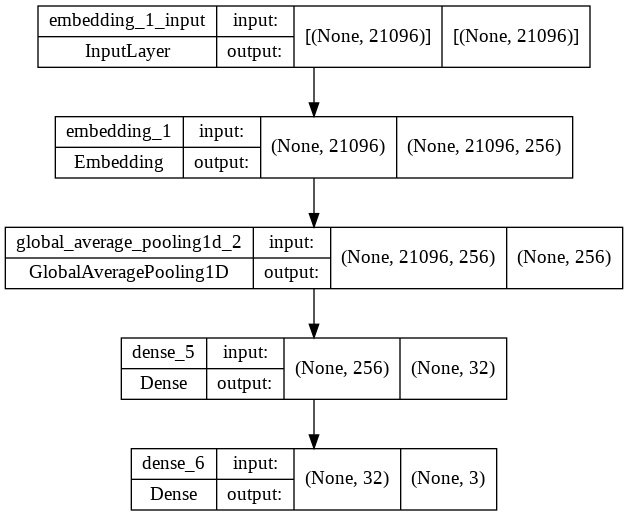

In [62]:
keras.utils.plot_model(model_dnn_2, "sentiment_analysis_stockcrash_model_dnn_tfidf.png", show_shapes=True)

Structured's same.

## Long Short-Term Memory(LSTM)

The second research uses LSTM which is a deep learning model which also benefits for the Natural Language Program.

### Second Research

In [63]:
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(LSTM(32))
model_lstm_1.add(Dense(32,activation='relu'))
model_lstm_1.add(Dense(3,activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')



As usual in this second research I use the Sequetial model with several inputs:
- Fixed shape input using text vectorization from tensor flow

- Then use the embedding of tensor flow because running time using tensorflow is faster than tfidf

- LSTM definition with 32 simple layers

- Added a single hidden layer with 32 layers in it and using activation relu

- As usual the output layer and compile is the same as the first research

In [64]:
model_lstm_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 256)           5400576   
                                                                 
 lstm (LSTM)                 (None, 32)                36992     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5,438,723
Trainable params: 5,438,723
Non-trainable params: 0
____________________________________________

Parameters increased from the previous DNN, which in this LSTM has added a layer in it which affects the increase in the number of parameters later.

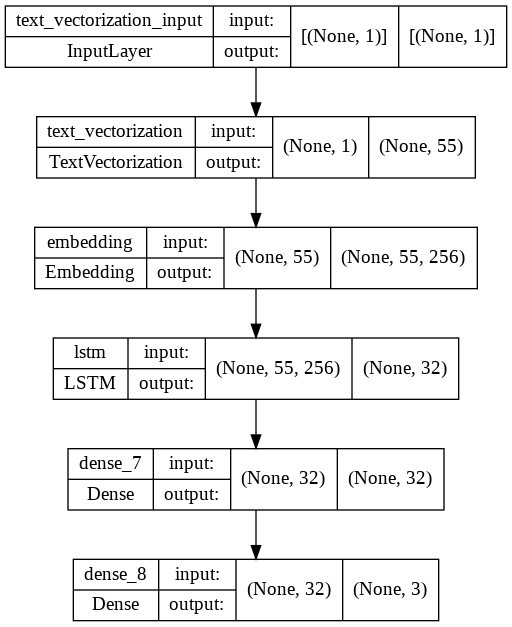

In [65]:
keras.utils.plot_model(model_lstm_1, "sentiment_analysis_stockcrash_model_lstm.png", show_shapes=True)

Structure's same.

### Improvement

In [66]:
model_lstm_1_imp = Sequential()
model_lstm_1_imp.add(text_vectorization)
model_lstm_1_imp.add(embedding)
model_lstm_1_imp.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model_lstm_1_imp.add(Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_lstm_1_imp.add(BatchNormalization())
model_lstm_1_imp.add(Dropout(0.5))
model_lstm_1_imp.add(Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model_lstm_1_imp.add(BatchNormalization())
model_lstm_1_imp.add(Dropout(0.5))
model_lstm_1_imp.add(Dense(3,activation='softmax'))

model_lstm_1_imp.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics='accuracy')



For improvement in this second research using LSTM, it is enough to add a few parameters from the first research using DNN:

- The addition of LSTM still uses 32 layers, but I added the dropout and recurrent_dropout 0.2 or 20% parameters in the LSTM later when training will be dropped.

- Using double hidden layers with the first layer 256 layers using relu activation, L2 regularizer, normal random initializer with 0.5 standard deviation

- Then the second hidden layer uses 128 layers with the same activation, regularizer, and initializer as the first hidden layer.

- After the two hidden layers, respectively, BatchNormalization and Dropout 0.5 are added, which means that in the dropout 50% of the parameters of the hidden layer will not be trained later.

- All hidden layers and other stuff are meant to set the validation loss which is forced to match the training loss, to avoid overfitting

- Output layer using softmax with 3 labels

- Compile is the same as before but the optimizer adam uses Learning Rate 0.0001 to reduce exploding later on learning curves

In [127]:
model_lstm_1_imp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 256)           5400576   
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense_9 (Dense)             (None, 256)               8448      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)              

After defining a dropout that is large enough, but non-trainable params are small enough to be untrained.

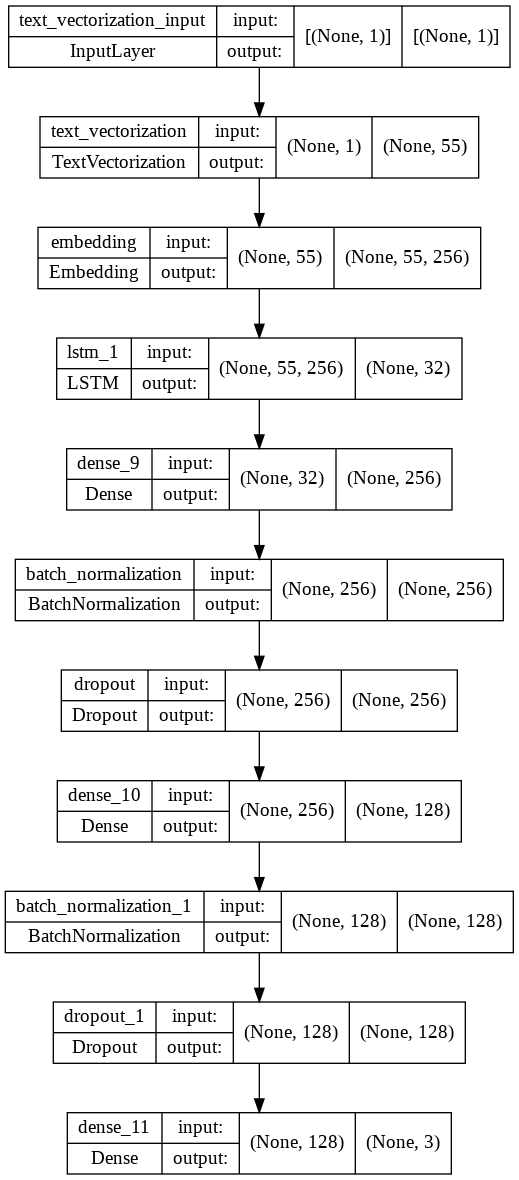

In [68]:
keras.utils.plot_model(model_lstm_1_imp, "sentiment_analysis_stockcrash_model_lstm_improvement.png", show_shapes=True)

Structure's same.

# 7 - Model Training

After we define the model with several times of research, then we do the training.

## Deep Neural Network (DNN)




### DNN First Research

In [69]:
%%time
model_dnn_hist_1 = model_dnn_1.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
637/637 [==============================] - 6s 5ms/step - loss: 0.8995 - accuracy: 0.5823 - val_loss: 0.6853 - val_accuracy: 0.6984
Epoch 2/50
637/637 [==============================] - 3s 4ms/step - loss: 0.4745 - accuracy: 0.8243 - val_loss: 0.5438 - val_accuracy: 0.7912
Epoch 3/50
637/637 [==============================] - 3s 4ms/step - loss: 0.2920 - accuracy: 0.9046 - val_loss: 0.5522 - val_accuracy: 0.8158
Epoch 4/50
637/637 [==============================] - 3s 4ms/step - loss: 0.2121 - accuracy: 0.9335 - val_loss: 0.5522 - val_accuracy: 0.8189
Epoch 5/50
637/637 [==============================] - 3s 4ms/step - loss: 0.1641 - accuracy: 0.9506 - val_loss: 0.6137 - val_accuracy: 0.8030
Epoch 6/50
637/637 [==============================] - 3s 4ms/step - loss: 0.1310 - accuracy: 0.9628 - val_loss: 0.6489 - val_accuracy: 0.8064
Epoch 7/50
637/637 [==============================] - 4s 6ms/step - loss: 0.1120 - accuracy: 0.9687 - val_loss: 0.7805 - val_accuracy: 0.7877
Epoch 

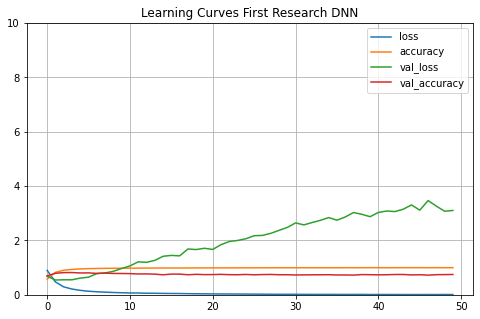

In [70]:
pd.DataFrame(model_dnn_hist_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves First Research DNN")
plt.show()

It can be seen that this first research training with simple parameters in the definition of the model, that the validation loss trend is rising away from the train loss which causes the possibility of overfitting or the model will be very biased later. So I don't think it's suitable to be modeled for data inference.

### DNN with Improvement

In this DNN model, the training data uses X_train and y_train_ohe with batch size I define into 32 groups where the parameters will be entered into the batch size and then trained with the parameters that have been substituted into the batch size group and 50 epochs is sufficient.

In [71]:
%%time
model_dnn_hist_1_imp = model_dnn_1_imp.fit(X_train,
                         y_train_ohe,
                         batch_size=32,
                         epochs=100,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/100
637/637 [==============================] - 4s 5ms/step - loss: 222.0599 - accuracy: 0.8980 - val_loss: 200.8192 - val_accuracy: 0.7398
Epoch 2/100
637/637 [==============================] - 3s 5ms/step - loss: 181.5797 - accuracy: 0.9833 - val_loss: 164.5344 - val_accuracy: 0.7504
Epoch 3/100
637/637 [==============================] - 3s 5ms/step - loss: 148.5417 - accuracy: 0.9890 - val_loss: 134.6103 - val_accuracy: 0.7557
Epoch 4/100
637/637 [==============================] - 3s 5ms/step - loss: 121.2275 - accuracy: 0.9894 - val_loss: 109.7892 - val_accuracy: 0.7559
Epoch 5/100
637/637 [==============================] - 3s 5ms/step - loss: 98.5328 - accuracy: 0.9905 - val_loss: 89.1340 - val_accuracy: 0.7571
Epoch 6/100
637/637 [==============================] - 3s 5ms/step - loss: 79.6582 - accuracy: 0.9912 - val_loss: 71.9646 - val_accuracy: 0.7582
Epoch 7/100
637/637 [==============================] - 3s 5ms/step - loss: 63.9928 - accuracy: 0.9911 - val_loss: 57.7369 

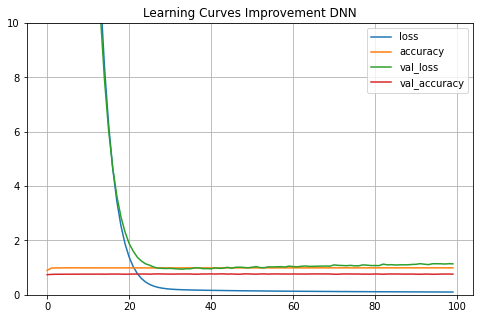

In [72]:
pd.DataFrame(model_dnn_hist_1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves Improvement DNN")
plt.show()

Then I looked for a solution for improving the DNN model with the model definition listed earlier in the Model Definition sub-chapter, it was proven that the validation loss with movement following the trainable loss was trending downwards, so it might be good enough for the results.

### DNN with Tfidf

In [73]:
model_dnn_hist_2 = model_dnn_2.fit(X_train_tfidf.todense(),
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val_tfidf.todense(), y_val_ohe))

Epoch 1/50
637/637 [==============================] - 51s 79ms/step - loss: 1.0951 - accuracy: 0.3670 - val_loss: 1.0933 - val_accuracy: 0.3755
Epoch 2/50
637/637 [==============================] - 44s 70ms/step - loss: 1.0948 - accuracy: 0.3678 - val_loss: 1.0935 - val_accuracy: 0.3755
Epoch 3/50
637/637 [==============================] - 44s 69ms/step - loss: 1.0947 - accuracy: 0.3678 - val_loss: 1.0929 - val_accuracy: 0.3755
Epoch 4/50
637/637 [==============================] - 49s 76ms/step - loss: 1.0947 - accuracy: 0.3678 - val_loss: 1.0933 - val_accuracy: 0.3755
Epoch 5/50
637/637 [==============================] - 44s 70ms/step - loss: 1.0947 - accuracy: 0.3678 - val_loss: 1.0932 - val_accuracy: 0.3755
Epoch 6/50
637/637 [==============================] - 44s 69ms/step - loss: 1.0946 - accuracy: 0.3678 - val_loss: 1.0929 - val_accuracy: 0.3755
Epoch 7/50
637/637 [==============================] - 48s 75ms/step - loss: 1.0945 - accuracy: 0.3678 - val_loss: 1.0931 - val_accuracy:

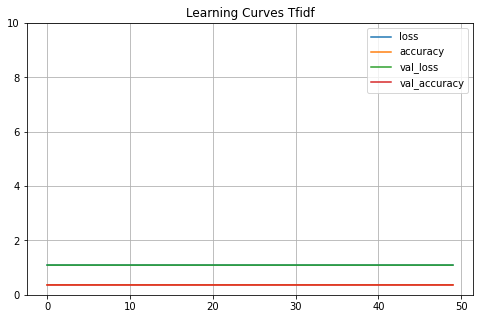

In [74]:
pd.DataFrame(model_dnn_hist_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves Tfidf")
plt.show()

From the references out there, there are many NLPs who train using Tfidf and get good grades. However, for this dataset, for some reason, the results are very poor and the running time is quite long compared to tensor flow, so it is not recommended to use tfidf for this dataset because it is not efficient.

## Long Short-Term Memory(LSTM)


### LSTM Second Research

In [75]:
%%time
model_lstm_hist_1 = model_lstm_1.fit(X_train,
                         y_train_ohe,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
637/637 [==============================] - 9s 8ms/step - loss: 1.0867 - accuracy: 0.3729 - val_loss: 1.0931 - val_accuracy: 0.3755
Epoch 2/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0949 - accuracy: 0.3678 - val_loss: 1.0939 - val_accuracy: 0.3755
Epoch 3/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0948 - accuracy: 0.3659 - val_loss: 1.0928 - val_accuracy: 0.3757
Epoch 4/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0452 - accuracy: 0.4192 - val_loss: 1.1106 - val_accuracy: 0.2889
Epoch 5/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0980 - accuracy: 0.3577 - val_loss: 1.0983 - val_accuracy: 0.3755
Epoch 6/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0962 - accuracy: 0.3633 - val_loss: 1.0936 - val_accuracy: 0.3755
Epoch 7/50
637/637 [==============================] - 4s 7ms/step - loss: 1.0960 - accuracy: 0.3602 - val_loss: 1.0935 - val_accuracy: 0.3755
Epoch 

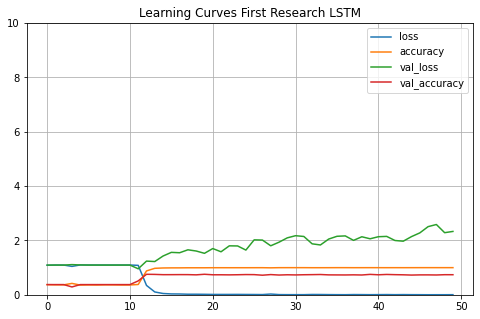

In [76]:
pd.DataFrame(model_lstm_hist_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves First Research LSTM")
plt.show()

The second research training using LSTM this time is quite satisfied because it is better than DNN which is seen from the accuracy graph which is quite good and steady, but still this validation loss tends to increase in trend so it is not perfect to become the final model later. So a deeper improvement is needed, which has been made in the LSTM improvement model below.

### LSTM with Improvement

In this LSTM model, the training data uses X_train and y_train_ohe with batch size I define into 64 groups where the parameters will be entered into the batch size and then trained with the parameters that have been substituted into the batch size group and 50 epochs is sufficient.

In [77]:
%%time
model_lstm_hist_1_imp = model_lstm_1_imp.fit(X_train,
                         y_train_ohe,
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
319/319 [==============================] - 63s 185ms/step - loss: 99.6570 - accuracy: 0.3401 - val_loss: 94.5371 - val_accuracy: 0.3755
Epoch 2/50
319/319 [==============================] - 59s 183ms/step - loss: 90.8586 - accuracy: 0.3401 - val_loss: 86.2321 - val_accuracy: 0.3755
Epoch 3/50
319/319 [==============================] - 58s 183ms/step - loss: 82.8643 - accuracy: 0.3377 - val_loss: 78.7186 - val_accuracy: 0.3753
Epoch 4/50
319/319 [==============================] - 59s 184ms/step - loss: 75.5139 - accuracy: 0.3390 - val_loss: 71.7064 - val_accuracy: 0.3763
Epoch 5/50
319/319 [==============================] - 59s 184ms/step - loss: 68.7405 - accuracy: 0.3582 - val_loss: 65.3047 - val_accuracy: 0.4448
Epoch 6/50
319/319 [==============================] - 58s 183ms/step - loss: 62.0958 - accuracy: 0.6108 - val_loss: 59.2918 - val_accuracy: 0.6157
Epoch 7/50
319/319 [==============================] - 59s 184ms/step - loss: 56.1531 - accuracy: 0.7704 - val_loss: 53

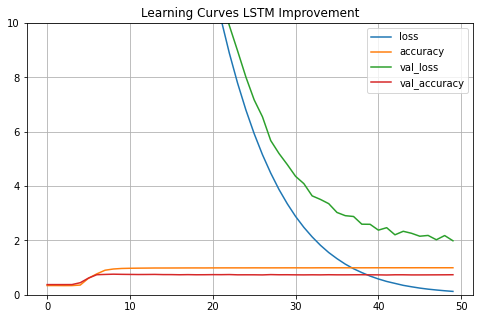

In [78]:
pd.DataFrame(model_lstm_hist_1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves LSTM Improvement")
plt.show()

Well, it's really very good to define an improvement model for LSTM where Validation Loss has followed a train loss where the trend is decreasing, and continues to decrease if epochs are added. However, the very long running time decided that I would only have 50 epochs.

# 8 - Model Evaluation

After being trained, the evaluation of learning curves is not enough, so we need to find a more valid result using several tools such as classification reports.

## Deep Neural Network (DNN)




### DNN First Research

In [79]:
model_dnn_1.evaluate(X_test, y_test_ohe)

266/266 [==============================] - 1s 2ms/step - loss: 12.2684 - accuracy: 0.5252


[12.268424034118652, 0.5251561403274536]

In [80]:
yp_seq_dnn_1 = model_dnn_1.predict(X_test)
yp_seq_dnn_1[:20]

array([[1.0000000e+00, 6.3590947e-26, 3.2695276e-32],
       [1.0000000e+00, 1.1989868e-22, 1.6459275e-27],
       [1.2187647e-15, 1.0000000e+00, 1.0128200e-20],
       [1.0000000e+00, 5.1375355e-23, 6.8763164e-27],
       [1.0000000e+00, 2.2422011e-13, 4.7622788e-11],
       [1.0000000e+00, 6.0086400e-21, 4.9660111e-27],
       [1.0000000e+00, 1.2951375e-16, 1.1840990e-25],
       [9.3618476e-01, 6.3815236e-02, 1.7987302e-14],
       [3.4589031e-15, 7.7528726e-11, 1.0000000e+00],
       [1.6913500e-13, 1.0000000e+00, 3.9037274e-13],
       [4.1690068e-21, 5.5033433e-24, 1.0000000e+00],
       [1.0000000e+00, 7.6247751e-22, 7.6833188e-29],
       [3.4915641e-07, 9.9914062e-01, 8.5902592e-04],
       [1.0000000e+00, 9.9162668e-18, 2.9275253e-23],
       [1.0000000e+00, 2.8603129e-13, 3.7080711e-24],
       [1.0000000e+00, 2.7773687e-14, 3.2672321e-18],
       [7.4039191e-01, 6.1487587e-10, 2.5960809e-01],
       [3.5740024e-01, 2.5327138e-08, 6.4259976e-01],
       [1.6986183e-16, 5.914

In [81]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_dnn_1 = yp_seq_dnn_1.argmax(axis=1)
print('Classification Report (Model Sequential DNN)')
print(classification_report(y_test, res_argmax_dnn_1, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential DNN)
              precision    recall  f1-score   support

     Neutral       0.45      1.00      0.62      2884
    Negative       0.69      0.31      0.42      2464
    Positive       0.85      0.27      0.41      3139

    accuracy                           0.53      8487
   macro avg       0.66      0.52      0.48      8487
weighted avg       0.67      0.53      0.48      8487



- It is proven that in this first research which shows from the learning curve where the validation curves are still in a condition of an increasing trend, by moving away from the train loss, there will be potential for overfitting.

- Coincidentally, this dataset has fairly balanced labels, so the metrics used match accuracy. It can be seen because the assumption of learning curves that validation loss is the opposite of train loss, affects a small accuracy of 53%, even though the learning curve for train data accuracy is quite large.

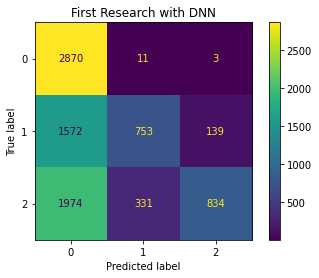

In [82]:
cm = confusion_matrix(y_test, res_argmax_dnn_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("First Research with DNN")
plt.show()

We prove it with the confusion matrix:

- That the 53 percent accuracy is so bad the model causes bias

- Judging from the prediction value of 0 (Neutral), the prediction is quite perfect which has a slight error.

- However, the prediction of the value of 1 (Negative) tends to be biased towards the prediction of the value of 0 (Neutral) and the error is even greater than the correct one.

- The prediction value of 2 (Positive) also tends to be biased towards the prediction of the value of 0 (Neutral) where the error is also greater than the truth.

### DNN with Improvement

In [83]:
model_dnn_1_imp.evaluate(X_test, y_test_ohe, batch_size=64)

133/133 [==============================] - 0s 2ms/step - loss: 1.8048 - accuracy: 0.6532


[1.80477774143219, 0.6532343626022339]

In [84]:
yp_seq_dnn_imp = model_dnn_1_imp.predict(X_test)
yp_seq_dnn_imp[:20]

array([[9.9994373e-01, 5.6198522e-05, 1.3878189e-07],
       [9.9960846e-01, 3.9006170e-04, 1.6082452e-06],
       [4.5192555e-05, 9.9994791e-01, 6.8625295e-06],
       [9.9975652e-01, 2.3954861e-04, 3.9275387e-06],
       [6.3090289e-01, 1.1011359e-01, 2.5898346e-01],
       [9.9966693e-01, 3.2863137e-04, 4.4342496e-06],
       [9.9246264e-01, 7.5093973e-03, 2.7876365e-05],
       [6.4594232e-02, 9.1224569e-01, 2.3160074e-02],
       [2.8373511e-04, 5.4223603e-03, 9.9429387e-01],
       [1.5009588e-04, 9.9931276e-01, 5.3713069e-04],
       [8.8406705e-06, 1.0802369e-06, 9.9999011e-01],
       [9.9892586e-01, 1.0730712e-03, 1.1103658e-06],
       [1.0147226e-03, 9.8547977e-01, 1.3505412e-02],
       [9.9280578e-01, 7.1592014e-03, 3.5079604e-05],
       [8.3546656e-01, 1.6451821e-01, 1.5254945e-05],
       [8.8810337e-01, 1.1100599e-01, 8.9054886e-04],
       [1.1041109e-02, 2.1705860e-02, 9.6725297e-01],
       [6.7585488e-03, 1.5783252e-02, 9.7745824e-01],
       [7.6297336e-05, 4.190

In [85]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_dnn_imp = yp_seq_dnn_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement DNN)')
print(classification_report(y_test, res_argmax_dnn_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement DNN)
              precision    recall  f1-score   support

     Neutral       0.59      0.97      0.73      2884
    Negative       0.66      0.62      0.64      2464
    Positive       0.88      0.39      0.54      3139

    accuracy                           0.65      8487
   macro avg       0.71      0.66      0.64      8487
weighted avg       0.71      0.65      0.63      8487



Then I made an improvement for the DNN model, the definition of which can be seen in the Model Definition and training sub-chapters using batch size 32:
- Get better accuracy than the first research using DNN, which is 65%
- But not good enough for recall which tends to predict better in Neutral, even though this label is quite balanced.

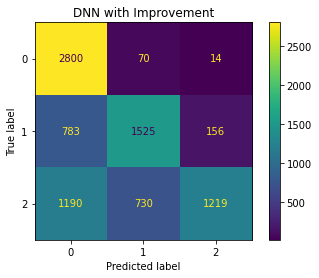

In [86]:
cm = confusion_matrix(y_test, res_argmax_dnn_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("DNN with Improvement")
plt.show()

Well we can see from confusion matrix above:
- Errors have become better in classification where correct predictions are more than errors for label 1 (Negative) and label 2 (Positive).
- Remains the same for label 0 (Neutral) which is pretty good at predicting the truth.

### DNN with Tfidf

In [87]:
model_dnn_2.evaluate(X_test_tfidf.todense(), y_test_ohe)

266/266 [==============================] - 2s 6ms/step - loss: 1.0937 - accuracy: 0.3699


[1.09373939037323, 0.3698597848415375]

In [88]:
yp_seq_dnn_2 = model_dnn_2.predict(X_test_tfidf.todense())
yp_seq_dnn_2[:20]

array([[0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827],
       [0.3429092 , 0.28975254, 0.36733827]], dtype=float32)

In [89]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_dnn_2 = yp_seq_dnn_2.argmax(axis=1)
print('Classification Report (Model Sequential Tfidf)')
print(classification_report(y_test, res_argmax_dnn_2, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Tfidf)
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00      2884
    Negative       0.00      0.00      0.00      2464
    Positive       0.37      1.00      0.54      3139

    accuracy                           0.37      8487
   macro avg       0.12      0.33      0.18      8487
weighted avg       0.14      0.37      0.20      8487



Seen in the classification report for tfidf:
- It was stated at the beginning that this model is very ugly
- It has been proven that the classification report accuracy is only 37% correct in predicting
- Only positive sentiments are successfully predicted on this tfidf model

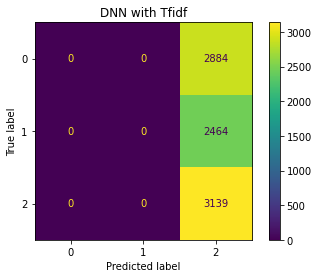

In [90]:
cm = confusion_matrix(y_test, res_argmax_dnn_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("DNN with Tfidf")
plt.show()

No need to explain again in the confusion matrix graph above because the model is bad.

## Long Short-Term Memory(LSTM)


### LSTM Second Research

In [91]:
model_lstm_1.evaluate(X_test, y_test_ohe)

266/266 [==============================] - 1s 3ms/step - loss: 2.2728 - accuracy: 0.7407


[2.2728123664855957, 0.7406622171401978]

In [92]:
yp_seq_lstm_1 = model_lstm_1.predict(X_test)
yp_seq_lstm_1[:20]

array([[9.9995947e-01, 3.1700925e-05, 8.8598708e-06],
       [9.9989831e-01, 8.4012019e-05, 1.7657771e-05],
       [3.6524503e-05, 9.9996018e-01, 3.3136764e-06],
       [9.9993277e-01, 4.4967372e-05, 2.2322538e-05],
       [1.6455959e-04, 4.9547674e-05, 9.9978596e-01],
       [9.9979097e-01, 1.5675787e-04, 5.2288542e-05],
       [9.9996507e-01, 3.0446179e-05, 4.5415900e-06],
       [1.3692357e-05, 9.8559695e-01, 1.4389285e-02],
       [3.0380750e-06, 2.5118500e-06, 9.9999440e-01],
       [1.6820790e-05, 9.9998105e-01, 2.0873197e-06],
       [2.1432631e-06, 2.0060170e-06, 9.9999583e-01],
       [9.9994731e-01, 4.4807322e-05, 7.9156998e-06],
       [3.0046080e-05, 3.9301199e-01, 6.0695797e-01],
       [9.9781430e-01, 6.1044830e-04, 1.5752537e-03],
       [1.4752138e-06, 9.9999392e-01, 4.6818886e-06],
       [1.4407406e-05, 9.9987781e-01, 1.0769291e-04],
       [1.7572815e-05, 9.8498067e-06, 9.9997258e-01],
       [1.7717142e-05, 8.8186298e-06, 9.9997342e-01],
       [5.4522629e-06, 2.846

In [93]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_lstm = yp_seq_lstm_1.argmax(axis=1)
print('Classification Report (Model Sequential LSTM)')
print(classification_report(y_test, res_argmax_lstm, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential LSTM)
              precision    recall  f1-score   support

     Neutral       0.80      0.85      0.82      2884
    Negative       0.63      0.71      0.67      2464
    Positive       0.79      0.67      0.72      3139

    accuracy                           0.74      8487
   macro avg       0.74      0.74      0.74      8487
weighted avg       0.75      0.74      0.74      8487



Well, this is my proud model that is LSTM for the Natural Language Program project by getting results:

- Accuracy is quite good at 74% but not perfect
- Surprisingly, judging from the learning curves in the Model Training sub-chapter, it shows that validation loss tends to trend up away from train loss, which indicates overfitting and causes poor accuracy. However, the recall and precision values are not much different or not overfitting.

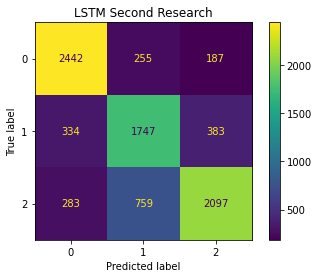

In [129]:
cm = confusion_matrix(y_test, res_argmax_lstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("LSTM Second Research")
plt.show()

Based on the confusion matrix above:

- Shows that the model predicts label 0 (Neutral) is still quite good
- For label 1 (Negative) it is also quite good at predicting the truth, but the prediction bias or error is quite balanced between label 0 and label 2
- Label 2 (Positive) is quite good at predicting the truth, but the model remains biased or error where this model for predicting label 2 tends to be biased towards label 1, which means that the model is still confused in distinguishing sentiments that should be negative instead of being positive.

### LSTM with Improvement

In [95]:
model_lstm_1_imp.evaluate(X_test, y_test_ohe, batch_size=64)

133/133 [==============================] - 2s 15ms/step - loss: 1.9221 - accuracy: 0.7489


[1.922061800956726, 0.7489100694656372]

In [96]:
yp_seq_lstm_imp = model_lstm_1_imp.predict(X_test)
yp_seq_lstm_imp[:20]

array([[9.99902606e-01, 8.45864779e-05, 1.27123340e-05],
       [9.99859810e-01, 1.20866323e-04, 1.93489432e-05],
       [5.59295768e-05, 9.99859691e-01, 8.43892267e-05],
       [9.99858022e-01, 1.22188372e-04, 1.98056168e-05],
       [5.76472667e-05, 1.99006288e-04, 9.99743283e-01],
       [9.99877334e-01, 1.05958454e-04, 1.66314348e-05],
       [9.99869347e-01, 1.12976988e-04, 1.76952562e-05],
       [1.96295514e-04, 9.99429166e-01, 3.74472060e-04],
       [2.46002892e-05, 7.01208264e-05, 9.99905229e-01],
       [8.98418875e-05, 9.99736726e-01, 1.73391090e-04],
       [2.05650704e-05, 5.93219411e-05, 9.99920130e-01],
       [9.99878407e-01, 1.05220752e-04, 1.63675977e-05],
       [2.77058990e-03, 3.47583070e-02, 9.62471068e-01],
       [8.04089427e-01, 1.71700627e-01, 2.42099930e-02],
       [1.67753315e-04, 9.99527097e-01, 3.05171416e-04],
       [2.28466336e-02, 8.91314387e-01, 8.58389735e-02],
       [3.23179629e-05, 1.06702850e-04, 9.99861002e-01],
       [3.19768915e-05, 1.00382

In [109]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_lstm_imp = yp_seq_lstm_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement LSTM)')
print(classification_report(y_test, res_argmax_lstm_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement LSTM)
              precision    recall  f1-score   support

     Neutral       0.81      0.85      0.83      2884
    Negative       0.65      0.71      0.68      2464
    Positive       0.78      0.69      0.73      3139

    accuracy                           0.75      8487
   macro avg       0.75      0.75      0.75      8487
weighted avg       0.75      0.75      0.75      8487



I made improvements to the LSTM model with results that matched expectations:

- Can increase accuracy to 75% from the previous only 74%.
- The value of the recall prediction has become better for positive label predictions that have gone up

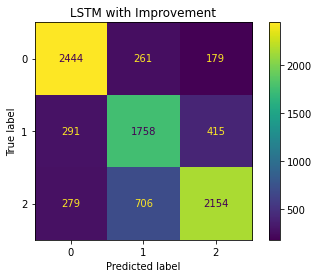

In [128]:
cm = confusion_matrix(y_test, res_argmax_lstm_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("LSTM with Improvement")
plt.show()

As usual there is not much difference in the bias between the simple and improved LSTM models:

- The model predicts correctly label 0 (Neutral) is still the best
- The model predicts correctly for label 1 (Negative) has added a lot and now the model is biased or predicts wrong for label 2 (Positive).
- The model correctly predicts label 2 (Positive) is better than before, but the model is still biased towards label 1 (Negative) which if there is a sentiment that should be positive but the model predicts it tends to be negative label.

# 9 - Model Saving

After I did the research model and analysis, I decided to save the DNN model after the improvement and the LSTM model after the improvement, because it was based on learning curves and a pretty good classification report.

## Model Freeze

In [ ]:
# freeze model
for layer in model_dnn_1_imp.layers:
  layer.trainable = False


# freeze model
for layer in model_lstm_1_imp.layers:
  layer.trainable = False

Freeze the model for efficiency size from freeze trainable params.

In [ ]:
model_lstm_1_imp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 256)           5382400   
                                                                 
 lstm_1 (LSTM)               (None, 32)                36992     
                                                                 
 dense_9 (Dense)             (None, 256)               8448      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)              

## Saving the Model

In [216]:
# prepare directory for saving model
model_dnn_1_imp.save('model_dnn_1_imp')
model_lstm_1_imp.save('model_lstm_1_imp')

INFO:tensorflow:Assets written to: model_dnn_1_imp/assets


INFO:tensorflow:Assets written to: model_dnn_1_imp/assets


INFO:tensorflow:Assets written to: model_lstm_1_imp/assets


INFO:tensorflow:Assets written to: model_lstm_1_imp/assets


# 10 - Model Inference

Based on the classification report, the model that gets the best accuracy is the LSTM model after improvement. So I will decide to use the LSTM model for data inference later so that the model can predict sentiment correctly and better, but it is not perfect.

## Load The Model

In [217]:
# Model load

model_dnn = tf.keras.models.load_model('model_dnn_1_imp')
model_lstm = tf.keras.models.load_model('model_lstm_1_imp')


In [132]:
# Check the contents of the model
model_lstm

In [133]:
# display inference set
data_inf

,text,text_sentiment,text_processed,label
0,Check your crypto wallets. Unlike your boy Nic...,Neutral,check crypto wallets unlike boy nick cannon ti...,0
1,#bearmarket bounce eh,Neutral,bounce eh,0
2,Problem with LUNA/UST: UST's market cap was ab...,Negative,problem luna ust ust market cap luna ust stabl...,1
3,blood bath #stockmarketcrash,Neutral,blood bath,0
4,Don’t just bag up #Altcoins &amp; other #crypt...,Positive,bag amp everytime see dip much logical hope wo...,2
5,EVERYTHING IS PLANNED AND GOING ACCORDING TO O...,Positive,everything planned going according desired path,2
6,I'm letting my community accumulate my #NFTs d...,Neutral,letting community accumulate making prices slo...,0
7,The biggest and most brutal upward movements a...,Negative,biggest brutal upward movements happening bear...,1
8,I see lot many people and groups giving a lot ...,Positive,see lot many people groups giving lot emphasis...,2
9,$BTC broke the $20k barrier. Many thought it w...,Negative,btc broke k barrier many thought happen means ...,1


Call data inference that i set from data preprocessing, i drop 10 data from a raw data to be data inference.

## Inferencing

In [149]:
# prepare data for inferencing
X_inf_prepared = data_inf.drop(columns=['text', 'text_sentiment', 'label'])
y_inf_prepared = data_inf['label']

# print shape of prepared data
print(X_inf_prepared.shape)

(10, 1)


Then drop the text, text_sentiment, and label first

In [150]:
X_inf_prepared

,text_processed
0,check crypto wallets unlike boy nick cannon ti...
1,bounce eh
2,problem luna ust ust market cap luna ust stabl...
3,blood bath
4,bag amp everytime see dip much logical hope wo...
5,everything planned going according desired path
6,letting community accumulate making prices slo...
7,biggest brutal upward movements happening bear...
8,see lot many people groups giving lot emphasis...
9,btc broke k barrier many thought happen means ...


## Prediction

In [151]:
# scale and encode the inference set
y_inf_dummy = to_categorical(y_inf_prepared)
y_inf_dummy


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [152]:
# Evaluation result
model_lstm.evaluate(X_inf_prepared, y_inf_dummy, batch_size=64)

1/1 [==============================] - 0s 33ms/step - loss: 1.1955 - accuracy: 0.9000


[1.1954811811447144, 0.8999999761581421]

In [153]:
# Determines prediction result
y_inf_pred_lstm = model_lstm.predict(X_inf_prepared)
y_inf_pred_lstm

array([[9.99902606e-01, 8.45864779e-05, 1.27123340e-05],
       [9.99859810e-01, 1.20866323e-04, 1.93489432e-05],
       [5.59295768e-05, 9.99859691e-01, 8.43892267e-05],
       [9.99858022e-01, 1.22188372e-04, 1.98056168e-05],
       [5.76472667e-05, 1.99006288e-04, 9.99743283e-01],
       [9.99877334e-01, 1.05958454e-04, 1.66314348e-05],
       [9.99869347e-01, 1.12976988e-04, 1.76952562e-05],
       [1.96295514e-04, 9.99429166e-01, 3.74472060e-04],
       [2.46002892e-05, 7.01208264e-05, 9.99905229e-01],
       [8.98418875e-05, 9.99736726e-01, 1.73391090e-04]], dtype=float32)

In [154]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_inf = y_inf_pred_lstm.argmax(axis=1)
print('Classification Report (Model Sequential LSTM Inference)')
print(classification_report(y_inf_prepared, res_argmax_inf, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential LSTM Inference)
              precision    recall  f1-score   support

     Neutral       0.80      1.00      0.89         4
    Negative       1.00      1.00      1.00         3
    Positive       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.93      0.89      0.90        10
weighted avg       0.92      0.90      0.90        10



Well! My model LSTM is working!

In [214]:
twt = ["The market is good"]

sentiment = model_lstm_1_imp.predict(twt)
if(np.argmax(sentiment) == 0):
    print("Neutral")
elif(np.argmax(sentiment) == 1):
    print("Negative")
elif(np.argmax(sentiment) == 2):
    print("Positive")

Negative


In [215]:
sentiment

array([[0.01853387, 0.973945  , 0.00752105]], dtype=float32)

Well the new data predict Negative that is kind of sentiment, My model still bias the predict it should be Positive sentiment.

# 11 - Conclusion

## On EDA

With high inflation in the United States, which triggered the collapse of stock markets around the world. This makes Twitter netizens lament, with freedom of speech on a social media platform called Twitter by tweeting various kinds of sentiments, including Neutral, Negative, and Positive tweets. From that tweet, I will analyze it using a deep learning model to find out which tweet contains what sentiment is called Sentiment Analysis:

- The dataset is taken from kaggle which was just uploaded in June 2022, knowing that the content of the dataset is to create a Sentiment Analysis model on the Stock Market Huge Crash in the world each Country.
- A dataset containing a text whose size is 33946 rows and 18 columns, but this time I will create a Natural Language Program model, which requires only the "text" column for features and "text_sentiment" for the target later.
- Get a categorical target with 3 labels, namely Neutral = 0, Negative = 1, and Positive = 2. The three labels are fairly balanced with each other, each of which is Neutral = 33.9%, Positive = 36.9%, and Negative = 29.2% .
- If we dig deeper into the words in this dataset or this tweet using wordcloud, we know which words will often appear in each sentiment. However, words that often appear tend to be the same as stock market themes and there is no word dominance that arises in each of these sentiments.

## On a Model

I use several models with Sequential type, namely Deep Neural Network and Long Short-Term Memory (LSTM):
- My first research using DNN was by defining a model with GlobalAveragePool1D with simple parameters, then training with token vectorizer and embedding from tensorflow, which was my first step to find out how good this dataset is. Of course, the first step of my first model research was getting a poor accuracy of 53% which spurred me to do more research on the DNN model by adding some parameters.
- From the DNN model I made improvements by adding a double hidden layer and from each hidden layer I also added parameters such as activation, initializer, and regularizer, also compile with optimizer adam added a learning rate of 0.0001 to reduce exploding that occurred during training datasets and adding batches size 32 group for training. As a result, I got better results than the first research, which is 67% accuracy, but it's not perfect, it needs some more research from this model.
- DNN training model with data transformed with scikit learn Tfidf is very bad for this dataset to model.
- I'm still curious, I did a second research using the Long Short-Term Memory (LSTM) model that benefits this NLP project. With a simple initial model definition, the full details can be found in the Model Definition sub-chapter. As a result, we get a satisfactory classification report with an accuracy of 74% which is very far from the DNN model.
- However, I'm still trying with the intention of increasing the accuracy of the LSTM model, namely the improvement model by adding a double hidden layer from each hidden layer and adding parameters such as activation, initializer, and regularizer, and adding batch normalization and dropout for each hidden layer, also compile with optimizer adam added a learning rate of 0.0001 to reduce the exploding that occurs during the training dataset and added a batch size of 64 groups for training. As a result, the learning curve is quite good and the classification report with the expectation of accuracy is increasing, to 75%, although it can be said that it is better because the learning curve that shows loss continues to decrease, as epochs increase.

## Implication

There are many model implications that occur in this NLP research, it is necessary to add more experience from domain experts, namely myself, with several implications, including:

- Not being able to increase the accuracy of this model, it is necessary to do more research to work on this NLP project by continuing to explore out there
- Models are only made in 2 DNN Models and LSTM Models, due to inadequate devices for deeper research for this modeling
- It takes a lot more time to explore this dataset itself so that it is perfect for cleaning text from tweets in the dataset, so maybe if you have mastered it you can add to the final result later
- The long running time makes this research limited. Adequate devices are needed for deeper research for models with deep learning.

## Future Improvement

This far from perfect model still needs to be explored further with a few ideas:

- Added transfer learning to add results that are better and more perfect than other models out there and combined with this model.
- Due to the dataset balance but not perfect, undersampling is needed which allows the prediction model results to be more accurate and may increase the accuracy.
- Add parameters or delete parameters that have been made in the model definition, by deepening the research again to get even better results.
- Need to be compared with other models such as Gru, Glove, Word2vec and others in order to know which one is suitable and perfect for modeling in this dataset.